In [19]:
#!python -m pip install sounddevice --user
from scipy import signal 
# Ανατρέξτε στην τεκμηρίωση της βιβλιοθήκης scipy.signal
# https://docs.scipy.org/doc/scipy/reference/signal.html
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

# Δείτε την έκδοση της αριθμητικής βιβλιοθήκης numpy
np.__version__

import warnings
warnings.filterwarnings('ignore')

# Άσκηση 2η

# Σχεδιασμός/υλοποίηση ψηφιακών φίλτρων FIR 

## Μέρος 1: Εισαγωγή

Στη python οι συναρτήσεις fft και ifft υποθέτουν ζεύγος μετασχηματισμού Fourier x(t) και
X(f) υπολογισμένων σε μη αρνητικά διαστήματα t=[0:N-1]ts και  f=[0:N-1]fo.Όπως έχετε ήδη δει
στην Εργαστηριακή άσκηση 1, το άνω μισό μέρος του διαστήματος συχνοτήτων αντιστοιχεί στις
αρνητικές συχνότητες του σήματος, όταν υπολογίζουμε το X(f) με τη βοήθεια της συνάρτησης fft.
Ακριβώς το ίδιο ισχύει και για το άνω μισό μέρος του χρονικού διαστήματος, όταν το σήμα x(t)
προκύπτει από τον αντίστροφο μετασχηματισμό Fourier μέσω της ifft.
Για να κατανοήσετε τα ανωτέρω θεωρείστε το διάνυσμα [1 2 3 4] ως το αποτέλεσμα του FFT
μήκους 4. Τότε, το πρώτο στοιχείο (1) είναι ο όρος dc, το τρίτο στοιχείο (3) είναι το σημείο στο
μισό της συχνότητας δειγματοληψίας fs/2, που μπορεί να εκληφθεί ότι αντιστοιχεί είτε στην –fs/2
είτε στην +fs/2. Τα στοιχεία 2 και 4 αντιστοιχούν στις συχνότητες +fs/4 και –fs/4. Εφαρμόζοντας την
fftshift, το στοιχείο 3 εμφανίζεται πρώτο, που σημαίνει ότι στη python αντιστοιχεί στην
αρνητική συχνότητα –fs/2, το επόμενο στοιχείο 4 αντιστοιχεί στη συχνότητα –fs/4 ακολουθούμενο
από το dc και τη συχνότητα +fs/4. Για ένα μετασχηματισμό περιττού μήκους, δεν υφίσταται σημείογια το ±fs/2. Έτσι για το διάνυσμα [1 2 3], η εφαρμογή της fftshift θα δώσει τα στοιχεία πουαντιστοιχούν στις συχνότητες –fs/3, 0, +fs/3.
Εκτός του ότι παράγουν εξόδους με τις αρνητικές συχνότητες ή χρόνους στο άνω μισό του
διανύσματος, αμφότερες οι συναρτήσεις fft και ifft αναμένουν ως είσοδο διάνυσμα με την ίδια
μορφή, αφού προφανώς ισχύουν οι ταυτότητες

h = ifft(fft(h)) και H = fft(ifft(H))


Η πρώτη υποδεικνύει ότι η είσοδος της ifft πρέπει να είναι αντεστραμμένη, όπως την παράγει η
fft, και η δεύτερη ότι η είσοδος της fft πρέπει να είναι αντεστραμμένη, όπως την παράγει η ifft.
Στο επόμενο σχήμα βλέπετε παραστατικά ένα ημιτονικό σήμα που έχει πολλαπλασιασθεί με
παράθυρο Blackman τόσο στην αμφίπλευρη, όσο και την μονόπλευρη αναπαράστασή του.

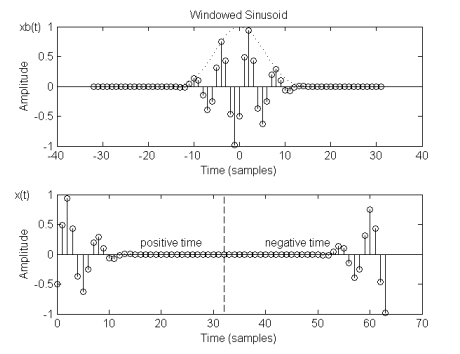

Οι αντίστοιχοι μετασχηματισμοί Fourier, σε αμφίπλευρη και μονόπλευρη αναπαράσταση,
φαίνονται στο επόμενο σχήμα:

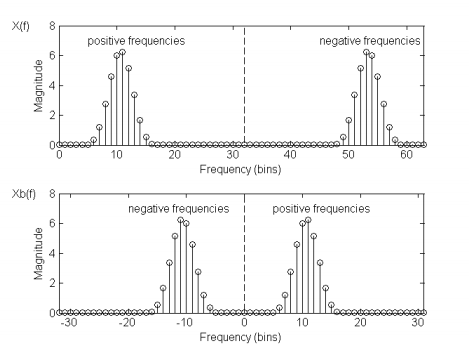

Όταν τα x(t) και X(f) παράγονται , δεν χρειάζεται κάποια ιδιαίτερη προσοχή, πλην
της κυκλικής ολίσθησης σε περίπτωση που θέλουμε π.χ. να σχεδιάσουμε το αμφίπλευρο φάσμα ή
σήμα. Όταν όμως ένα εκ των x(t) ή X(f) ορίζεται από τον χρήστη απαιτείται περισσότερη προσοχή,
διότι, συνήθως χρησιμοποιούνται τα αμφίπλευρα σήματα ή φάσματα. Μπορείτε να μεταβείτε από
τη μία αναπαράσταση στην άλλη ως εξής:

x = np.fft.ifftshift(xb), X = np.fft.fft(x), Xb = np.fft.fftshift(X), εάν ξεκινάτε από αμφίπλευρο σήμα και
θέλετε να καταλήξετε σε αμφίπλευρο φάσμα, και

X = np.fft.ifftshift(Xb), x = np.fft.ifft(X), xb = np.fft.fftshift(x), εάν ξεκινάτε από αμφίπλευρο φάσμα
και θέλετε να καταλήξετε σε αμφίπλευρο σήμα,

όπου η συνάρτηση np.fft.ifftshift  εκτελεί την αντίστροφη λειτουργία της np.fft.fftshift.
Όταν το N είναι άρτιο, οι fftshift και ifftshift δίνουν το ίδιο αποτέλεσμα. Όταν όμως το N
είναι περιττό αυτό δεν ισχύει και χρειάζεται προσοχή στη χρήση τους. Στην πράξη, η προσεκτική
εφαρμογή των ανωτέρω έχει σημασία όταν υπολογίζεται η φάση του φάσματος. Το πλάτος του
φάσματος δεν επηρεάζεται από την κυκλική ολίσθηση των στοιχείων που προκαλούν οι fftshift
και ifftshift (δείτε ιδιότητες DFT).

Εξάσκηση
Δοκιμάστε στο παράθυρο εντολών τα ακόλουθα προκειμένου να εμπεδώσετε τη χρήση των
συναρτήσεων fftshift και ifftshift.

In [20]:
#erwthsh 1
#X=np.arange(-2,2)
X=np.arange(-1,3)
print(np.fft.fftshift(X))
print(np.fft.ifftshift(X))
Y = np.fft.fftshift(np.fft.fftshift(X))
Z= np.fft.ifftshift(np.fft.fftshift(X))
print(np.array_equal(X,Y))
print(np.array_equal(X,Z))

[ 1  2 -1  0]
[ 1  2 -1  0]
True
True


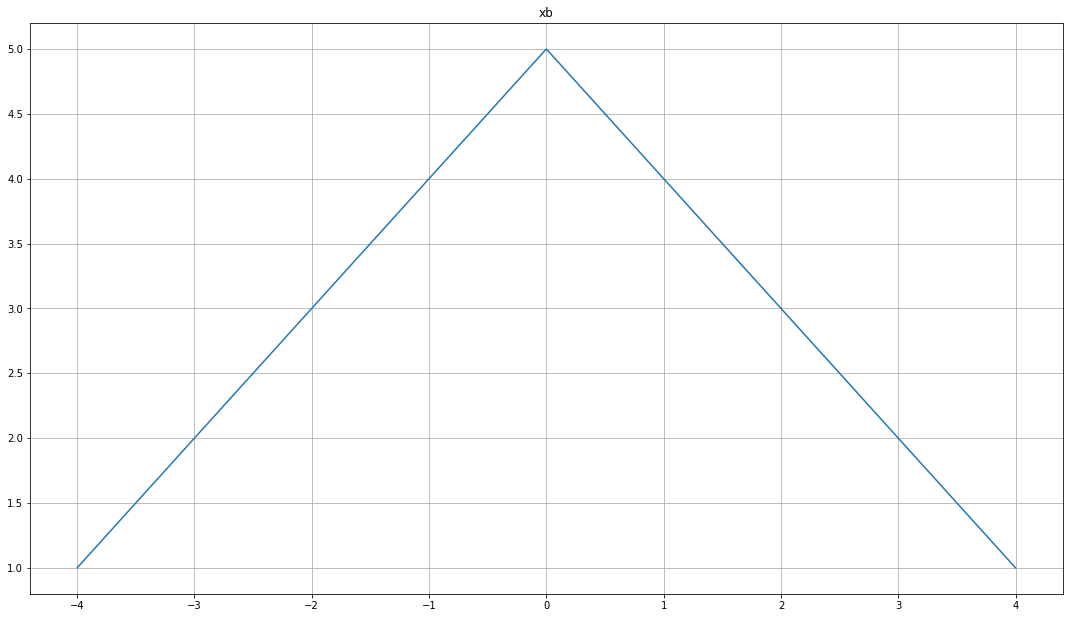

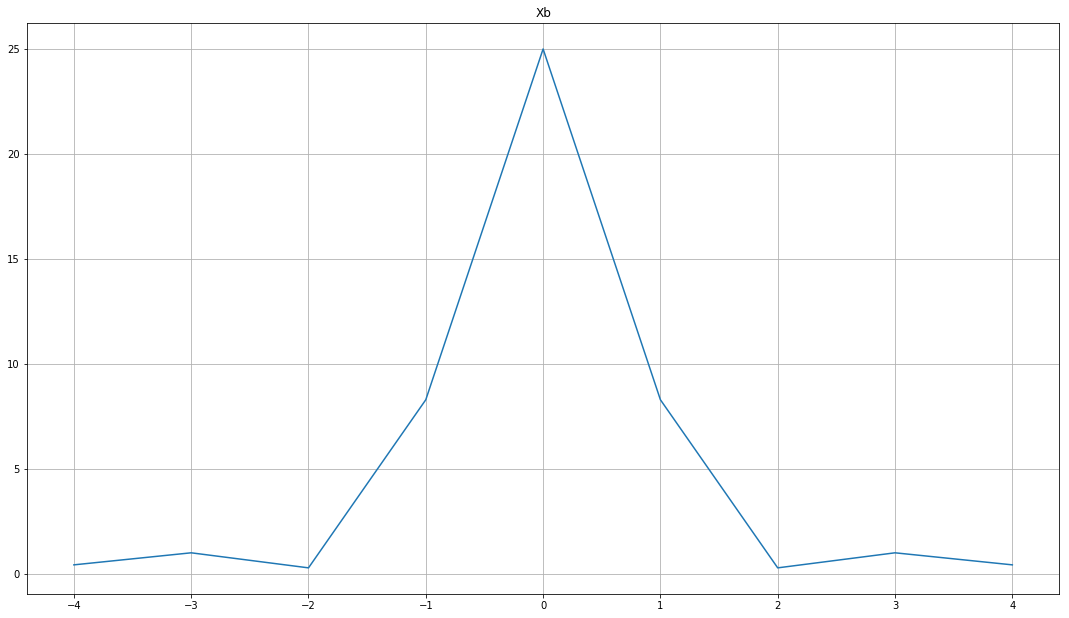

In [21]:
#erwthsh 2

xb=np.array([1,2,3,4,5,4,3,2,1]) # πραγματικό σήμα με άρτια συμμετρία 
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(np.arange(-4,5),xb)
ax.set( title='xb')
ax.grid()
plt.show()

x=np.fft.ifftshift(xb) # το σήμα με τις αρνητικές συνιστώσες στο άνω μέρος
X=np.fft.fft(x)        #FFT
Xb=np.fft.fftshift(X) # το φάσμα με τη dc συνιστώσα στο κέντρο, πραγματικές
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(np.arange(-4,5),Xb)
ax.set( title='Xb')
ax.grid()
plt.show()

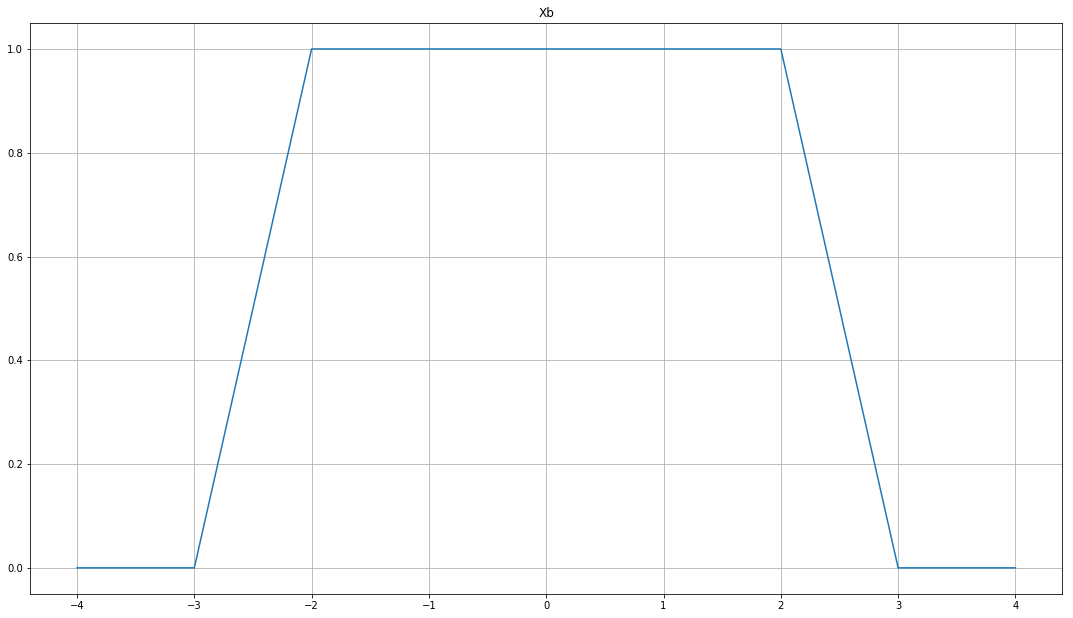

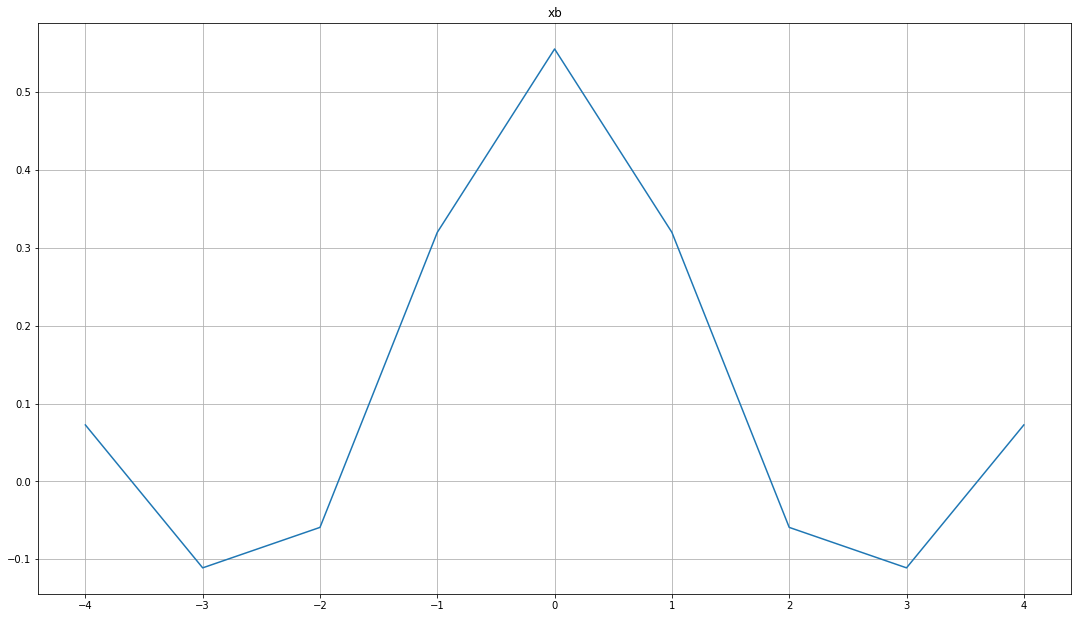

In [22]:
Xb=np.array([0,0,1,1,1,1,1,0,0]) #φάσμα βαθυπερατού σήματος με άρτια συμμετρία
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(np.arange(-4,5),Xb)
ax.set( title='Xb')
ax.grid()
plt.show()

X=np.fft.ifftshift(Xb)   #το φάσμα με τις αρνητικές συνιστώσες στο άνω μέρος
x=np.fft.ifft(X)          #IFFT
xb=np.fft.fftshift(x)     #πραγματικό σήμα με άρτια συμμετρία όπως αναμένεται
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(np.arange(-4,5),xb)
ax.set( title='xb')
ax.grid()
plt.show()

3h Ερώτηση :Τροποποιείστε το προηγούμενο παράδειγμα ώστε να ξεκινήσετε απευθείας με τον
ορισμό του φάσματος του βαθυπερατού σήματος X όπως το αναμένει η ifft. 

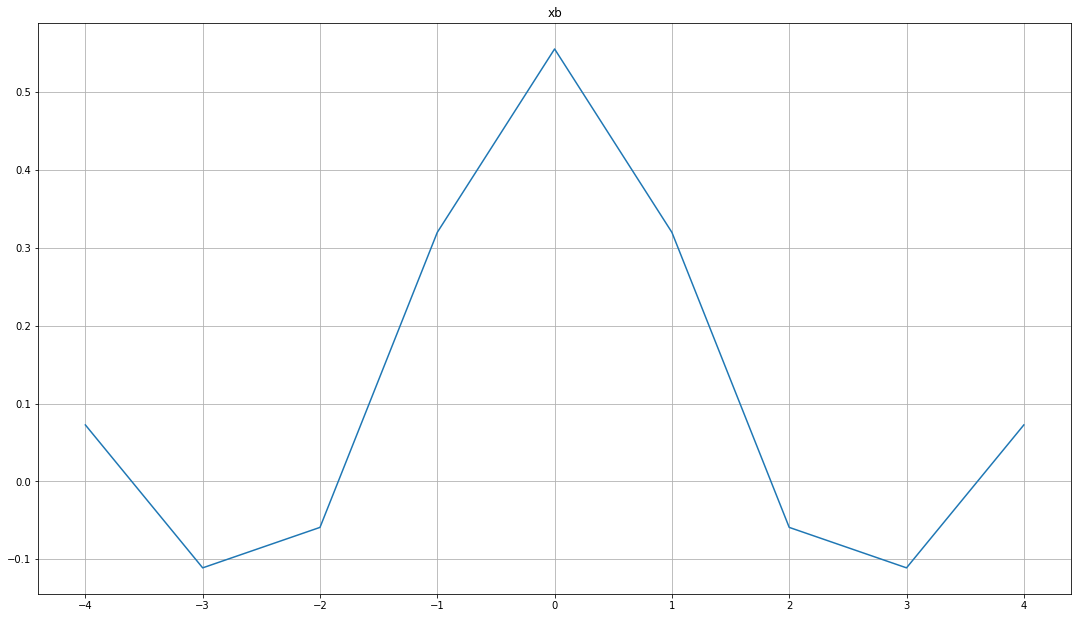

In [23]:
#erwthsh 3
#Ορίζουμε το Χ ως Χ=[1 1 1 0 0 0 0 1 1]. Στη συνέχεια ολισθαίνουμε κυκλικά το σήμα, ώστε οι αρνητικές
#συχνότητες να βρεθούν δεξιά από τις θετικές. 


X=np.array([1,1,1,0,0,0,0,1,1])
a=np.fft.ifft(X)   
xb=np.fft.fftshift(a)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(np.arange(-4,5),xb)
ax.set( title='xb')
ax.grid()
plt.show()

## Μέρος 2: Σχεδιασμός φίλτρων
Θα ασχοληθείτε με το παράδειγμα 1.2 της παραγράφου 1.5 του τεύχους Μαθήματος. Το
παράδειγμα αυτό παρουσιάζει δύο εναλλακτικούς τρόπους σχεδιασμού FIR φίλτρων:
α) τη μέθοδο των παραθύρων και
β) τη μέθοδο των ισοϋψών κυματώσεων
τους οποίους εφαρμόζει για την περίπτωση του σχεδιασμού ενός βαθυπερατού φίλτρου.
Για την εκτέλεση του παραδείγματος 1.2, αντιγράψτε τον Κώδικα 1.3 . Επίσης, κατεβάστε από την ιστοσελίδα του
μαθήματος το αρχείο sima.mat και ομοίως αποθηκεύστε το στο φάκελο εργασίας σας.
 Το sima.mat περιέχει δύο μεταβλητές: το διάνυσμα s που περιέχει ένα
σήμα σόναρ, το φάσμα του οποίου εκτείνεται μέχρι περίπου τα 4 KHz, και την τιμή της μεταβλητής
Fs, που είναι η συχνότητα με την οποία έγινε η δειγματοληψία του σήματος σόναρ. 

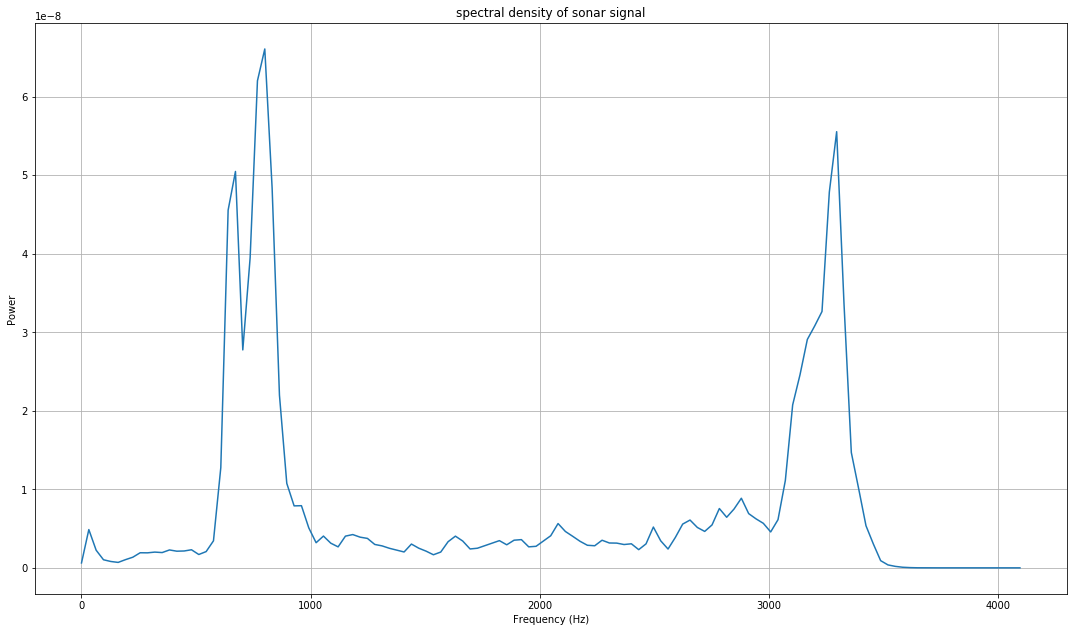

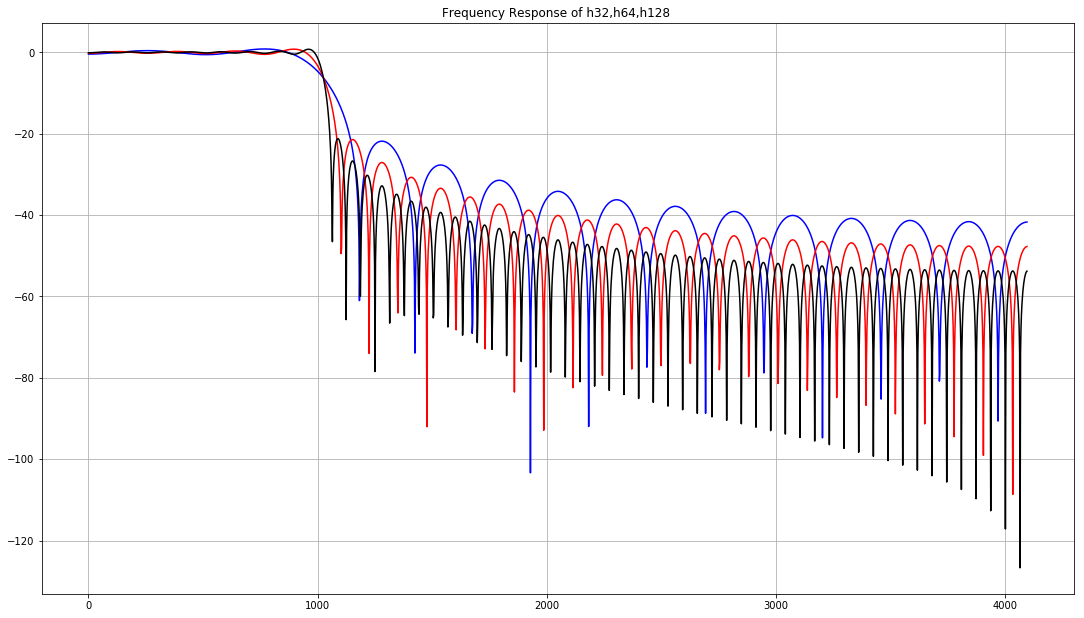

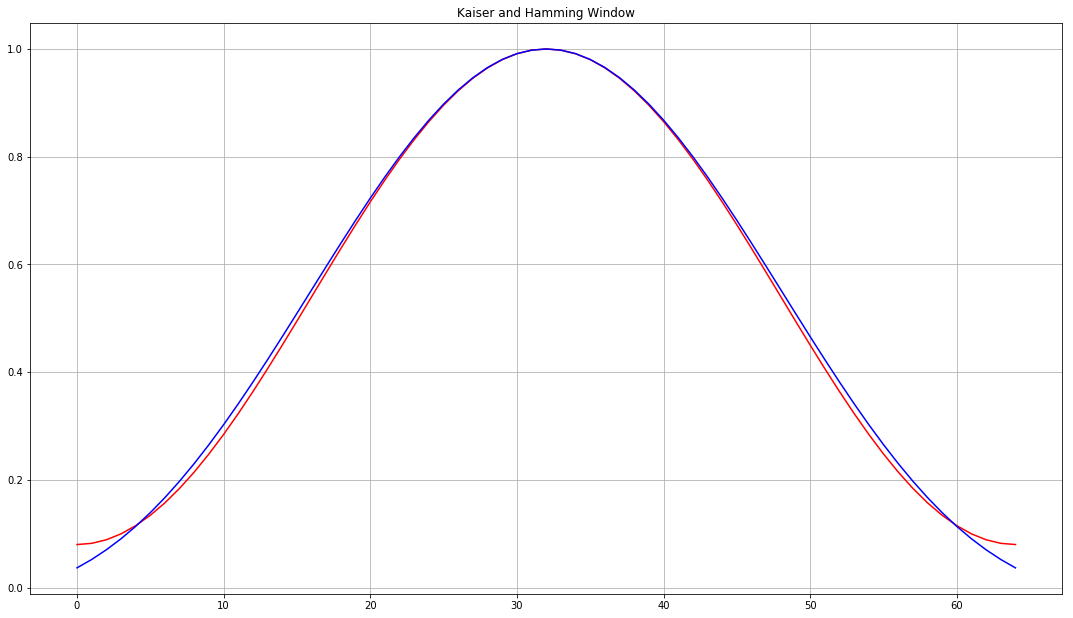

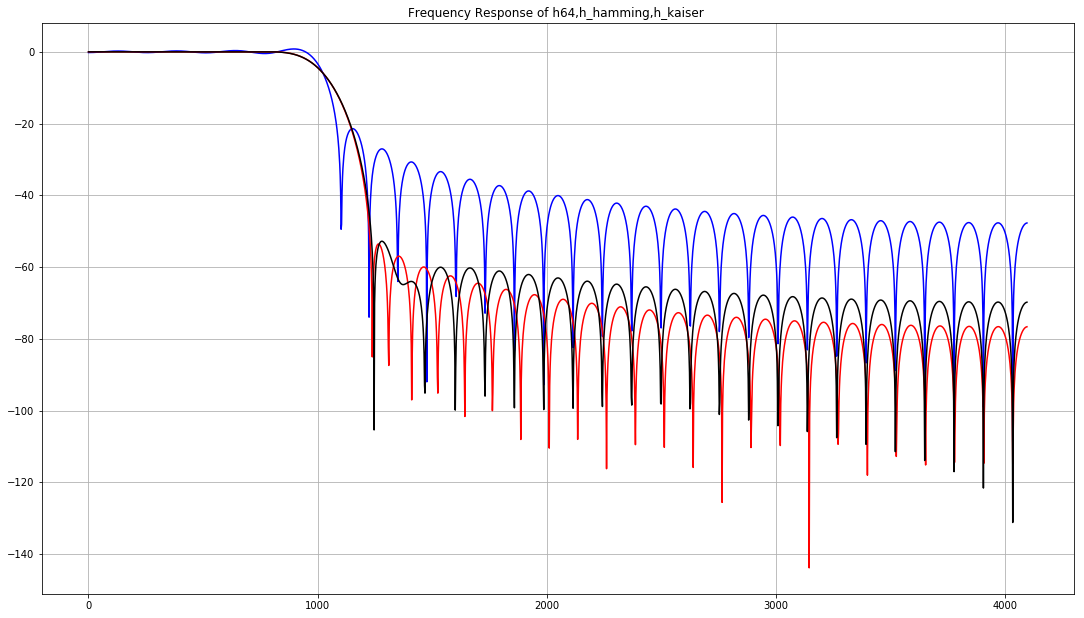

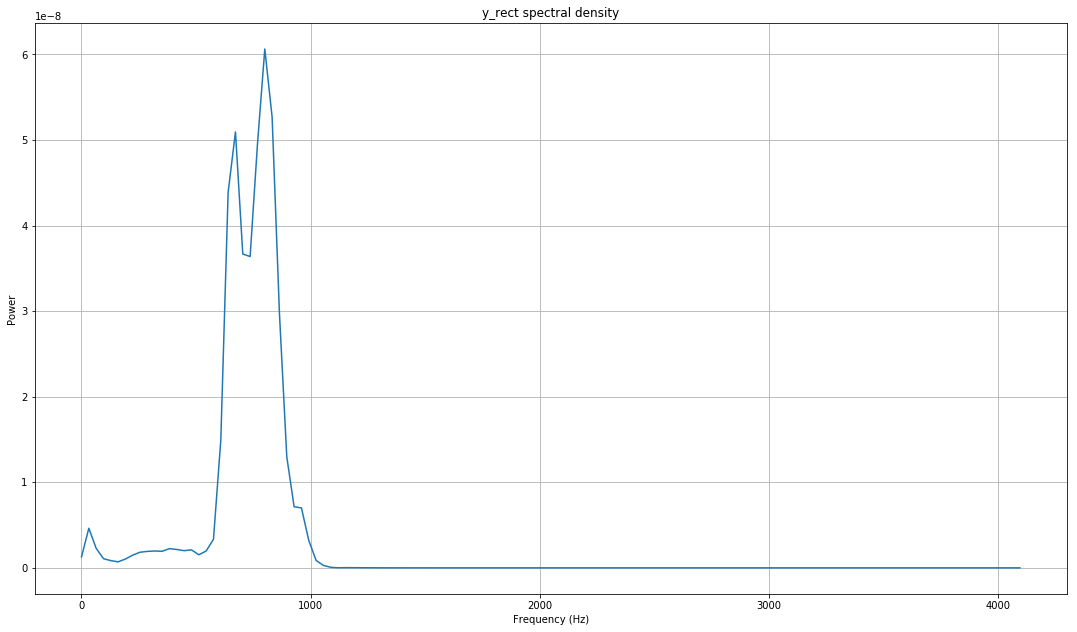

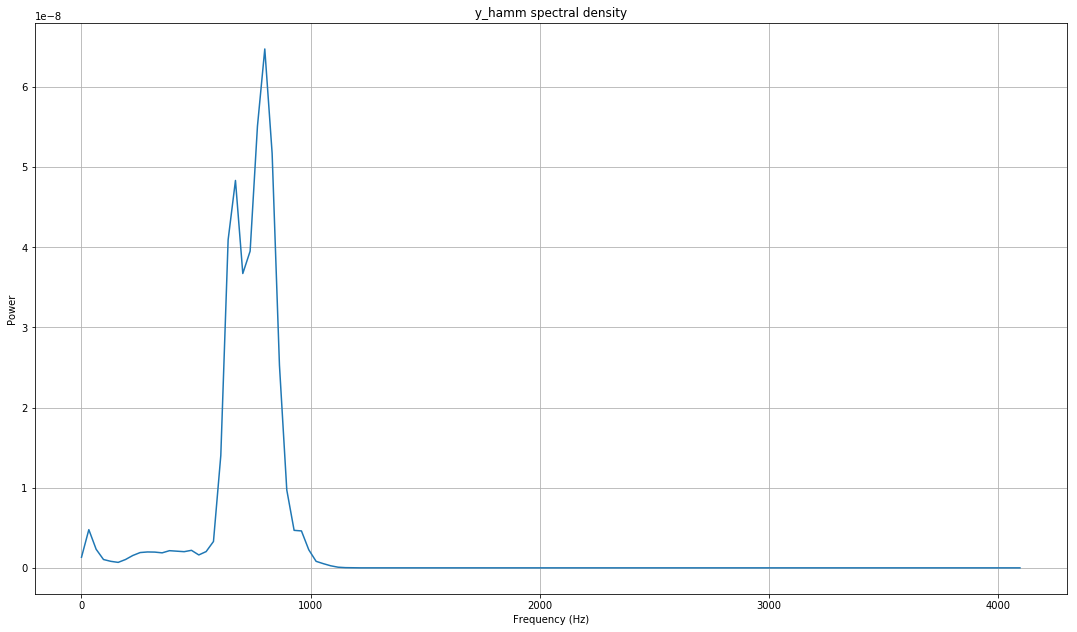

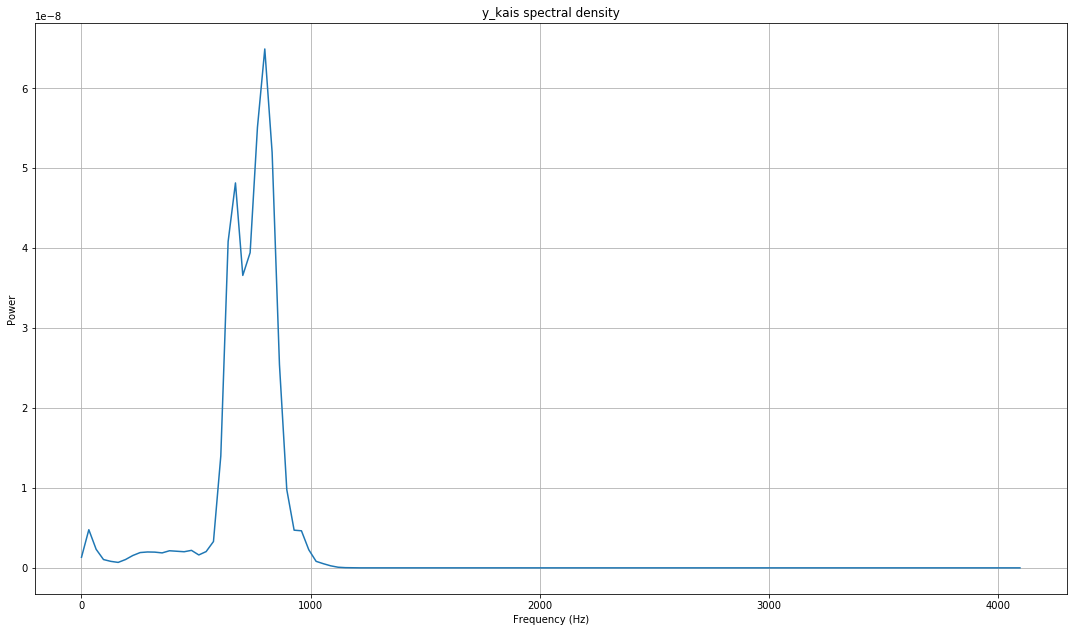

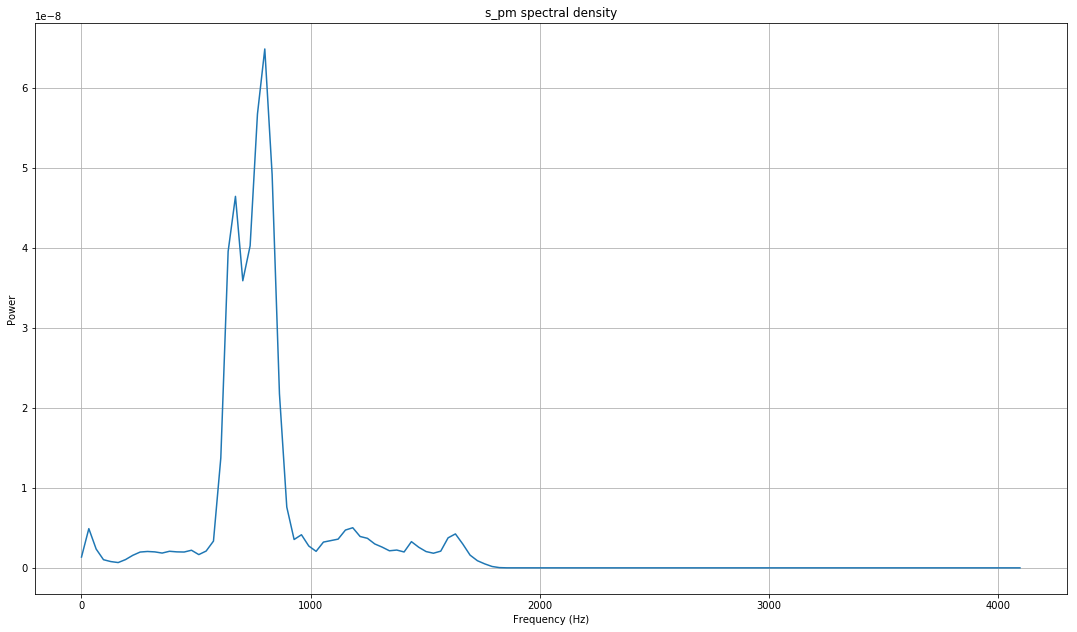

In [24]:

#Κώδικας 1.3: Ψηφιακά φίλτρα FIR – Παράδειγμα 1.2 σελ 26
import scipy.io as spio

mat = spio.loadmat('sima.mat', squeeze_me=True) # Το αρχείο "sima.mat" περιέχει το σήμα s και τη συχνότητα
                                            # δειγματοληψίας Fs. Το φάσμα του σήματος εκτείνεται σχεδόν σε όλη την
                                            # περιοχή συχνοτήτων μέχρι 4 KHz. Πάνω από 1 KHz, όμως, είναι θόρυβος
                                            #και πρέπει να φιλτραριστεί.

s = mat['s'] # array
Fs= mat['Fs']
f, Pxx_den = signal.welch(s, Fs)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f,Pxx_den)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title='spectral density of sonar signal')
ax.grid()
plt.show()


#Ορίζεται η ιδανική βαθυπερατή συνάρτηση Η, με συχνότ. αποκοπ. Fs/8
y=np.ones(int(Fs/8))
t=np.zeros(Fs-(int(Fs/4)))
H = np.concatenate((y, t,y))
#Υπολογίζεται η κρουστική απόκριση με αντίστροφο μετασχ. Fourier
u=np.fft.ifft(H)
u=u.real
middle=int(len(u)/2)

h= np.fft.fftshift(u)
h32=h[middle-16:middle+17] # h32=h(middle+1-16:middle+17) se matlab αλλα σε python δεν χρειάζεται το +1
h64=h[middle-32:middle+33]
h128=h[middle-64:middle+65]

w1, h1 = signal.freqz(h32, a=1, worN=2048, whole=False, plot=None, fs=Fs)
w2, h2 = signal.freqz(h64, a=1, worN=2048, whole=False, plot=None, fs=Fs)
w3, h3 = signal.freqz(h128, a=1, worN=2048, whole=False, plot=None, fs=Fs)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(w1, 20 * np.log10(abs(h1)), 'b')
ax.set( title='Frequency Response of h32,h64,h128 ')


ax.plot(w2, 20 * np.log10(abs(h2)), 'r')

ax.plot(w3, 20 * np.log10(abs(h3)), 'k')



ax.grid()

plt.show()

#Οι πλευρικοί λοβοί είναι υψηλοί!
# Πολλαπλασιάζουμε την περικομμένη κρουστική απόκριση με κατάλληλο  παράθυρο. Χρησιμοποιούμε την h64 και παράθυρα hamming και kaiser
wh=np.hamming(len(h64))
wk=np.kaiser(len(h64),5)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(np.arange(0,65),wh,'r')
ax.set( title='Kaiser and Hamming Window')

ax.plot(np.arange(0,65),wk,'b')
ax.grid()

plt.show()

h_hamming=np.multiply(h64,np.transpose(wh))
                      
#plt.plot(np.arange(0,len(h64)), h_hamming, '-.')

 
#plt.setp(baseline, color='r', linewidth=2)
#plt.show()
h_kaiser =np.multiply(h64,np.transpose(wk))

wkais, hkais = signal.freqz(h_kaiser, a=1, worN=2048, whole=False, plot=None, fs=Fs)
wham, hham = signal.freqz(h_hamming, a=1, worN=2048, whole=False, plot=None, fs=Fs)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(w2, 20 * np.log10(abs(h2)), 'b')
ax.set( title='Frequency Response of h64,h_hamming,h_kaiser ')


ax.plot(wkais, 20 * np.log10(abs(hkais)), 'r')

ax.plot(wham, 20 * np.log10(abs(hham)), 'k')
ax.grid()

plt.show()


#Φιλτράρουμε το σήμα μας με καθένα από τα τρία φίλτρα
y_rect=np.convolve(s,h64)

f1, Pxx1 = signal.welch(y_rect, Fs)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f1,Pxx1)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title='y_rect spectral density')
ax.grid()
plt.show()

y_hamm=np.convolve(s,h_hamming)
f2, Pxx2 = signal.welch(y_hamm, Fs)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f2,Pxx2)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title=' y_hamm spectral density ')
ax.grid()
plt.show()

y_kais=np.convolve(s,h_kaiser)
f3, Pxx3 = signal.welch(y_kais, Fs)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f3,Pxx3)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title='y_kais spectral density')
ax.grid()
plt.show()

#Βαθυπερατό Parks-MacClellan


hpm = signal.remez(64, [0, 0.2, 0.3, 0.4 ,0.45, 1] ,[1,1, 0], weight=None, Hz=2,)# The input bands must have twice the length of desired
s_pm=np.convolve(s,hpm)
f4, Pxx4 = signal.welch(s_pm, Fs)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f4,Pxx4)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title='s_pm spectral density')
ax.grid()
plt.show()


import sounddevice as sd
#sd.play(s,Fs) # before !python3 -m pip install sounddevice --user 
                 
sd.play(s_pm,Fs)  #hear the sonar signal

## Η μέθοδος των παραθύρων

Η μέθοδος των παραθύρων εφαρμόζεται στις γραμμές 22-128 του κώδικα. Πρώτο βήμα αποτελεί ο ορισμός της απόκρισης συχνότητας H ενός ιδανικού βαθυπερατού φίλτρου με συχνότητα αποκοπής
Fs/8 (γραμμή 25), μέσω ενός διανύσματος μήκους Ν=Fs, γεγονός που οδηγεί σε ανάλυση
συχνότητας fο = Fs/N = 1 Hz. Το διάνυσμα H αποτελείται από μια αλληλουχία μονάδων και
μηδενικών που δημιουργούνται από την κλήση των συναρτήσεων ones και zeros, αντίστοιχα. Τα Fs/8 πρώτα στοιχεία του H, που
αντιστοιχούν στις συχνότητες [0,Fs/8), είναι μονάδες, ακολουθούν 3Fs/4 μηδενικά και άλλες Fs/8
μονάδες που αντιστοιχούν στη ζώνη συχνοτήτων[–Fs/8, 0).

Επόμενο βήμα είναι ο υπολογισμός του αντίστροφου διακριτού μετασχηματισμού Fourier (IDFT),
που υπολογίζεται από τη συνάρτηση ifft της python (γραμμή 27). Ακολουθεί μια αναδιάταξη
του αποτελέσματος του αντίστροφου DFT (γραμμές 29-31), που ισοδυναμεί με ολίσθηση της
κρουστικής απόκρισης του φίλτρου κατά το μισό της μήκος. Στη συνέχεια, η κρουστική απόκριση
h περικόπτεται σε μήκη 32+1, 64+1 και 128+1 δειγμάτων (γραμμές 33-35). Με τη βοήθεια της συνάρτησης 
freqz() , απεικονίζονται στο ίδιο διάγραμμα η απόκριση συχνότητας του βαθυπερατού φίλτρου και για τα 3 παραπάνω μήκη.

Για να μειωθούν ακόμα περισσότερο αυτοί οι πλευρικοί λοβοί και οι επιπτώσεις του ορθογωνικού
παραθύρου, κατασκευάζονται παράθυρα Hamming και Kaiser (μέσω των συναρτήσεων hamming
και kaiser αντίστοιχα, γραμμές 59-60) τα οποία εφαρμόζονται στο φίλτρο μήκους 64+1 σημείων
h64 (γραμμές 72,79). Παρατηρήστε μέσω της συνάρτησης freqz() (γραμμή 81-82) τη σαφώς χαμηλότερη στάθμη
των πλευρικών λοβών στην απόκριση συχνότητας των παραθύρων Hamming και Kaiser σε σχέση
με το ορθογωνικό. Τέλος, το σήμα s φιλτράρεται με καθένα από τα τρία φίλτρα (ορθογωνικό,
Hamming, Kaiser), χρησιμοποιώντας τη συνάρτηση convolve που υπολογίζει τη συνέλιξη μεταξύ του
σήματος και της κρουστικής απόκρισης του εκάστοτε φίλτρου (γραμμές 99-128). Παράλληλα,
υπολογίζεται και σχεδιάζεται η πυκνότητα φάσματος ισχύος κατά Welch με τη βοήθεια της
συνάρτησης welch. Το αποτέλεσμα δείχνει εμφανώς την ραγδαία μείωση της φασματικής ισχύος
για συχνότητες άνω της Fs/8.

### Μέθοδος ισοϋψών κυματώσεων

Η μέθοδος των ισοϋψών κυματώσεων εφαρμόζεται στις γραμμές 133-142 του κώδικα για την
κατασκευή ενός φίλτρου Parks-McClellan. Η κατασκευή του φίλτρου πραγματοποιείται με την
κλήση της συνάρτησης remez (γραμμή 133). Για τον ορισμό των παραμέτρων εισόδου της remez
συμβουλευτείτε τo documentation στην python. Η εφαρμογή του φίλτρου στο σήμα γίνεται όπως
και στην προηγούμενη μέθοδο, με χρήση της συνάρτησης convolve (γραμμή 134).

#### Πειραματισθείτε
1. Τροποποιείστε τον κώδικα στην γραμμή 33 ώστε να επιτύχετε το ίδιο αποτέλεσμα με τη
χρήση μιας εκ των συναρτήσεων ifftshift ή fftshift.
2. Τροποποιείστε τον κώδικα ώστε να χρησιμοποιηθεί βαθυπερατό φίλτρο μήκους 256+1 αντί
του 64+1. Σχεδιάστε την απόκριση συχνότητας του φίλτρου με σχεδιασμό παραθύρου, όπως
στο παράδειγμα, για δύο περιπτώσεις: ορθογωνικού και Kaiser.
3. Σχεδιάστε φίλτρο Parks-McClellan μήκους 128+1, με τις ίδιες οριακές συχνότητες, όπως
στο παράδειγμα (0.1, 0.15). Σχεδιάστε την απόκριση συχνότητας και αυτού του φίλτρου και
σχολιάστε τις διαφορές από το φίλτρο ορθογωνικού παραθύρου του ερωτήματος 2. 
4. Αλλάξτε τις οριακές συχνότητες του φίλτρου του ερωτήματος 3 σε (0.1, 0.12) και
συγκρίνετε τις αποκρίσεις συχνότητας των δύο φίλτρων. 
5. Αντικαταστήστε το σήμα s με άθροισμα τριών ημιτονικών συναρτήσεων μοναδιαίου
πλάτους, συχνότητας 800, 2000 και 3000 Hz και διάρκειας 1.0 sec. Διατηρήστε την ίδια Fs =
8192 Hz.

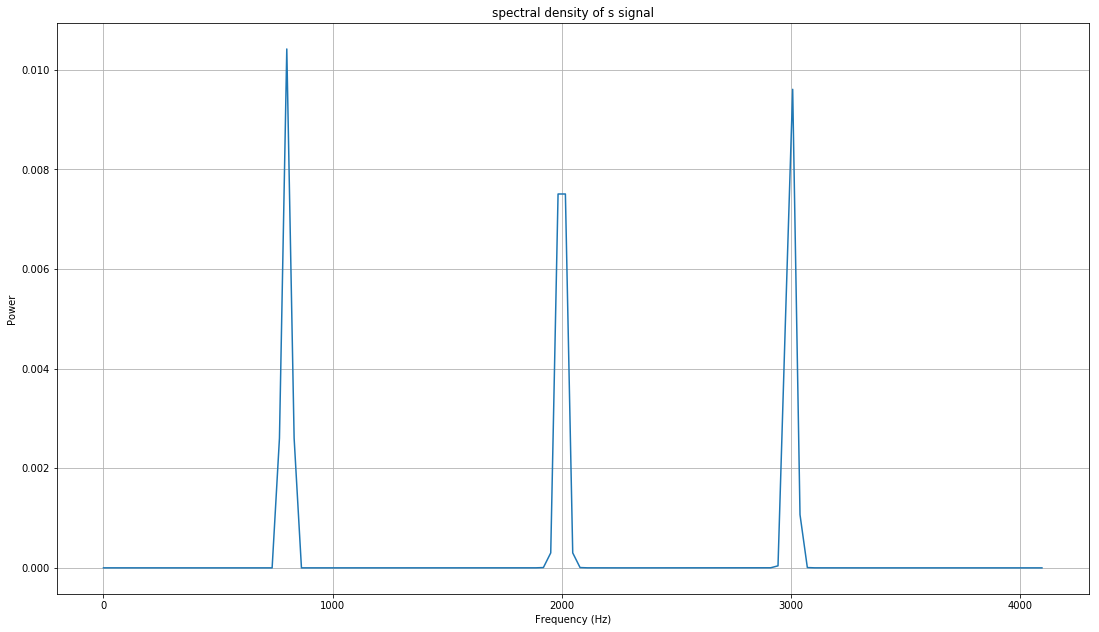

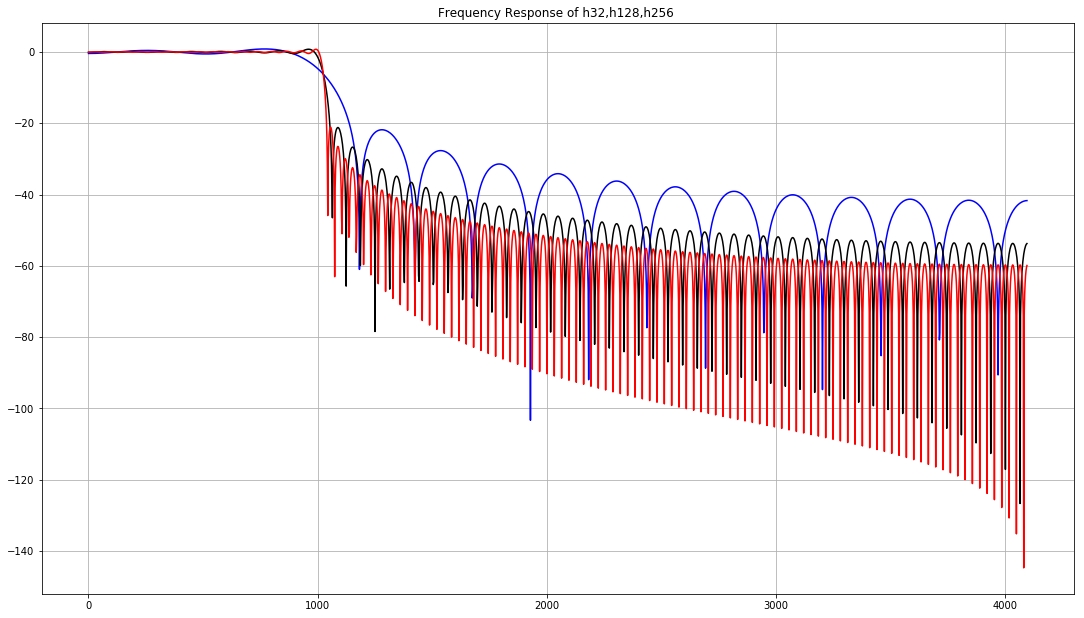

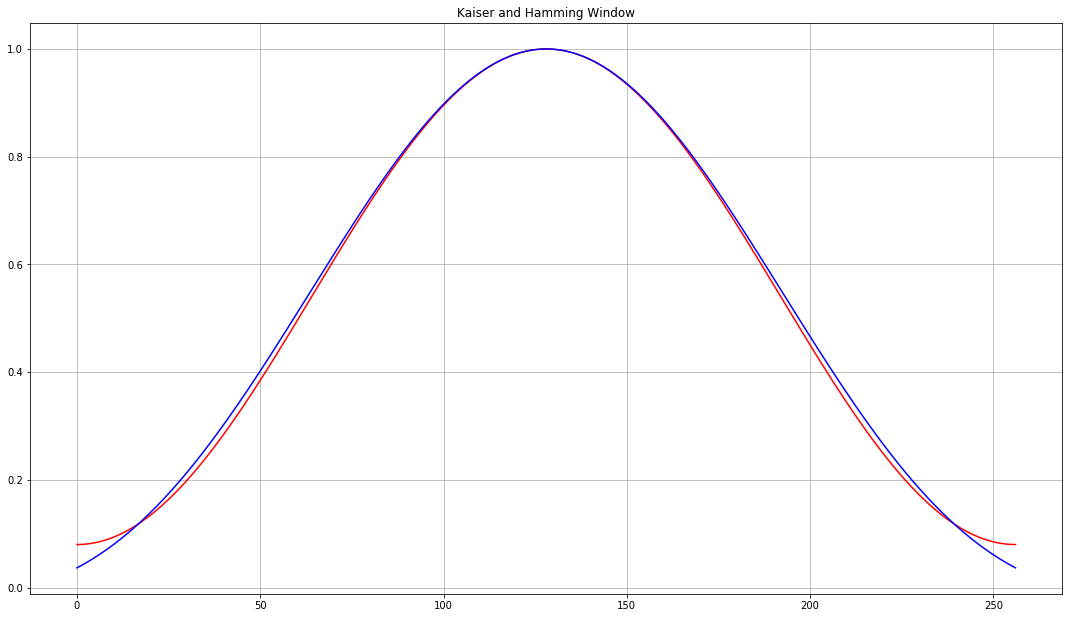

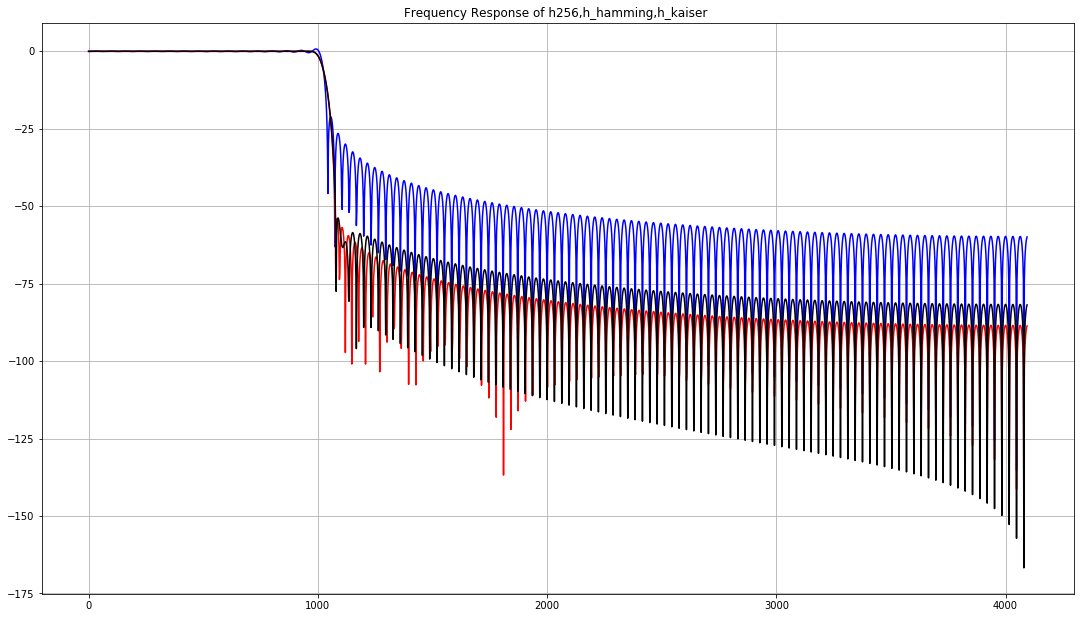

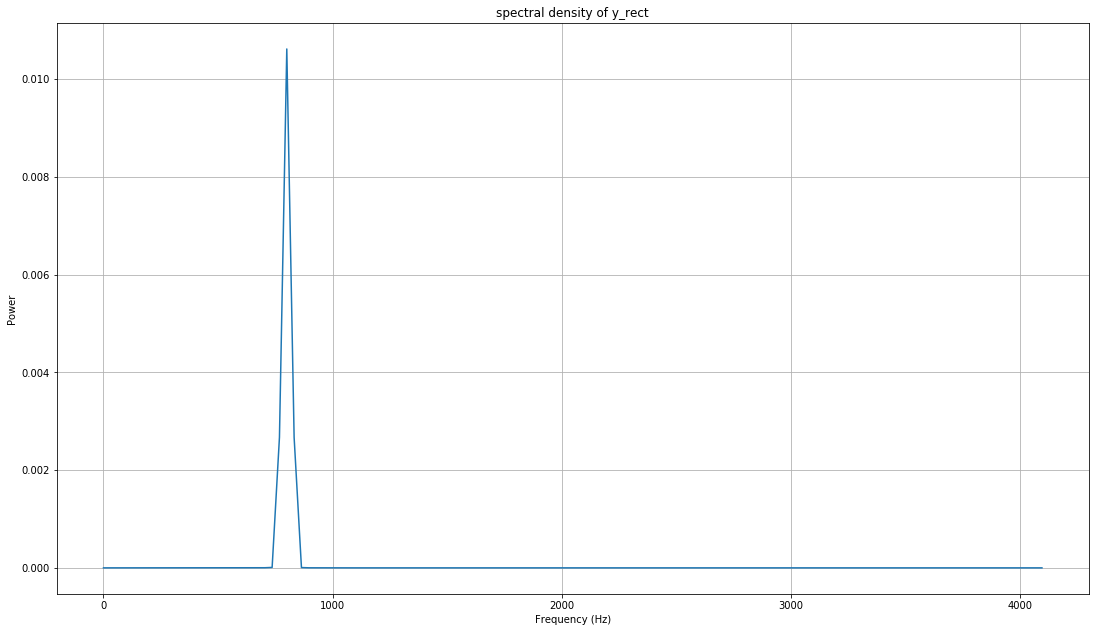

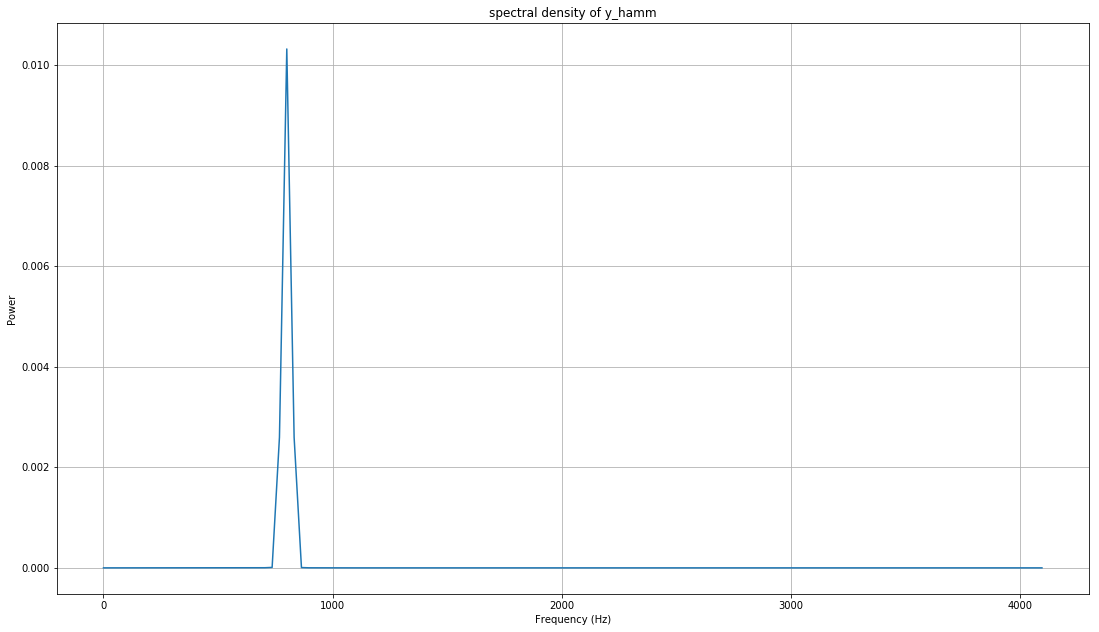

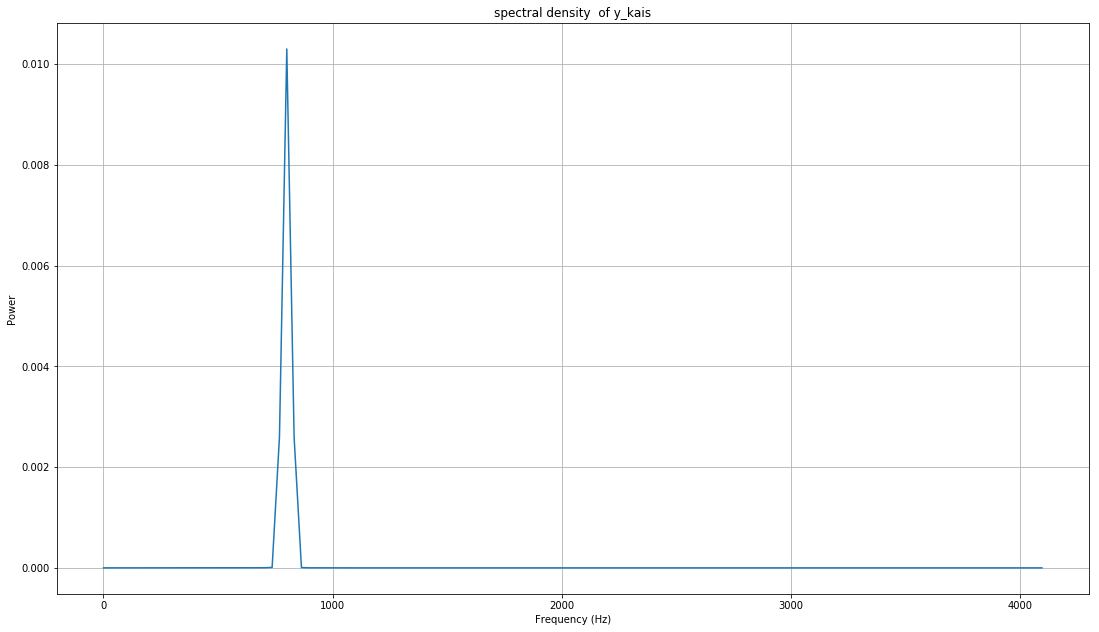

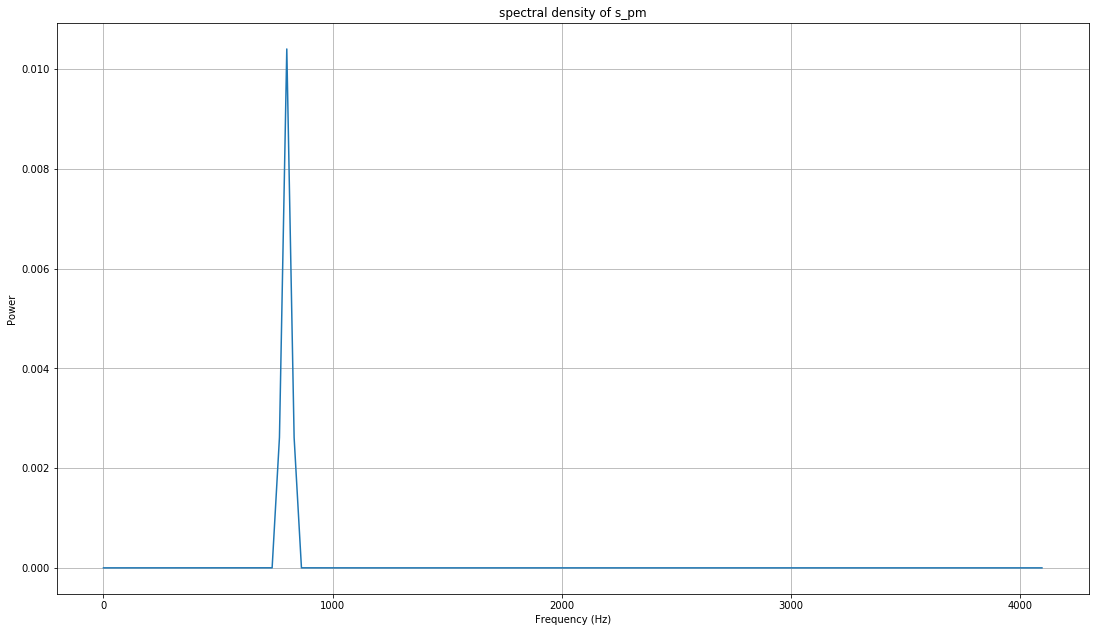

In [25]:

import scipy.io as spio

Fs=8192
Ts=1/Fs
A=1.0
T=1.0
t=np.arange(0,T-Ts,Ts)
s = np.sin(t*800*np.pi*2)+np.sin(t*2000*np.pi*2)+np.sin(t*3000*np.pi*2)

f, Pxx_den = signal.welch(s, Fs)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f,Pxx_den)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title='spectral density of s signal')
ax.grid()
plt.show()


#Ορίζεται η ιδανική βαθυπερατή συνάρτηση Η, με συχνότ. αποκοπ. Fs/8
y=np.ones(int(Fs/8))
t=np.zeros(Fs-(int(Fs/4)))
H = np.concatenate((y, t,y))
#Υπολογίζεται η κρουστική απόκριση με αντίστροφο μετασχ. Fourier
u=np.fft.ifft(H)
u=u.real
middle=int(len(u)/2)

#B,C=u[:middle],u[middle:]
#h= np.concatenate((B,C))
h=np.fft.fftshift(u)
h32=h[middle-16:middle+17] # h32=h(middle+1-16:middle+17) se matlab αλλα σε python δεν χρειάζεται το +1
#h64=h[middle-32:middle+33]
h128=h[middle-64:middle+65]
h256=h[middle-128:middle+129] # βαθυπερατό φίλτρο μήκους 256+1 που θέλουμε

w1, h1 = signal.freqz(h32, a=1, worN=2048, whole=False, plot=None, fs=Fs)
#w2, h2 = signal.freqz(h64, a=1, worN=2048, whole=False, plot=None, fs=Fs)
w3, h3 = signal.freqz(h128, a=1, worN=2048, whole=False, plot=None, fs=Fs)
w4, h4=signal.freqz(h256, a=1, worN=2048, whole=False, plot=None, fs=Fs)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(w1, 20 * np.log10(abs(h1)), 'b')
ax.set( title='Frequency Response of h32,h128,h256 ')


#ax.plot(w2, 20 * np.log10(abs(h2)), 'r')
ax.plot(w3, 20 * np.log10(abs(h3)), 'k')
ax.plot(w4, 20 * np.log10(abs(h4)), 'r')



ax.grid()

plt.show()

#Οι πλευρικοί λοβοί είναι υψηλοί!
# Πολλαπλασιάζουμε την περικομμένη κρουστική απόκριση με κατάλληλο  παράθυρο. Χρησιμοποιούμε την h256 και παράθυρα hamming και kaiser
wh=np.hamming(len(h256))
wk=np.kaiser(len(h256),5)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(np.arange(0,257),wh,'r')
ax.set( title='Kaiser and Hamming Window')

ax.plot(np.arange(0,257),wk,'b')
ax.grid()

plt.show()

h_hamming=np.multiply(h256,np.transpose(wh))
                      
#plt.plot(np.arange(0,len(h64)), h_hamming, '-.')

 
#plt.setp(baseline, color='r', linewidth=2)
#plt.show()
h_kaiser =np.multiply(h256,np.transpose(wk))

wkais, hkais = signal.freqz(h_kaiser, a=1, worN=2048, whole=False, plot=None, fs=Fs)
wham, hham = signal.freqz(h_hamming, a=1, worN=2048, whole=False, plot=None, fs=Fs)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(w4, 20 * np.log10(abs(h4)), 'b')
ax.set( title='Frequency Response of h256,h_hamming,h_kaiser ')


ax.plot(wkais, 20 * np.log10(abs(hkais)), 'r')

ax.plot(wham, 20 * np.log10(abs(hham)), 'k')
ax.grid()

plt.show()


#Φιλτράρουμε το σήμα μας με καθένα από τα τρία φίλτρα
y_rect=np.convolve(s,h256)

f1, Pxx1 = signal.welch(y_rect, Fs)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f1,Pxx1)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title='spectral density of y_rect')
ax.grid()
plt.show()

y_hamm=np.convolve(s,h_hamming)
f2, Pxx2 = signal.welch(y_hamm, Fs)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f2,Pxx2)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title='spectral density of y_hamm')
ax.grid()
plt.show()

y_kais=np.convolve(s,h_kaiser)
f3, Pxx3 = signal.welch(y_kais, Fs)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f3,Pxx3)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title='spectral density  of y_kais')
ax.grid()
plt.show()

#Βαθυπερατό Parks-MacClellan


#hpm = signal.remez(128, [0, 0.2, 0.3, 0.4 ,0.45, 1] ,[1,1, 0], weight=None, Hz=2,)# The input bands must have twice the length of desired
hpm = signal.remez(128, [0, 0.1, 0.12, 0.4 ,0.45, 1] ,[1,1, 0], weight=None, Hz=2,)
s_pm=np.convolve(s,hpm)
f4, Pxx4 = signal.welch(s_pm, Fs)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f4,Pxx4)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title='spectral density of s_pm')
ax.grid()
plt.show()


import sounddevice as sd
#sd.play(s,Fs) # before !python3 -m pip install sounddevice --user 
                 
sd.play(s_pm,Fs)  #hear the sonar signal

### Μέρος 3: Εφαρμογή A

Εκτελέστε την άσκηση 1.2 της παραγράφου 1.6 του τεύχους του μαθήματος, μεταβάλλοντας
κατάλληλα τον κώδικα του παραδείγματος 1.2 . Σκοπός της άσκησης είναι ο σχεδιασμός ενός ζωνοπερατού φίλτρου ζώνης
διέλευσης (750 Hz, 950 Hz) με τις δύο μεθόδους που περιγράφηκαν πιο πάνω και η εφαρμογή τους
στο σήμα s του παραδείγματος 1.2. Επαληθεύστε το σωστό σχεδιασμό του φίλτρου σας, ελέγχοντας
τόσο την απόκριση συχνότητάς του όσο και το αποτέλεσμα του φιλτραρίσματος στο σήμα s.

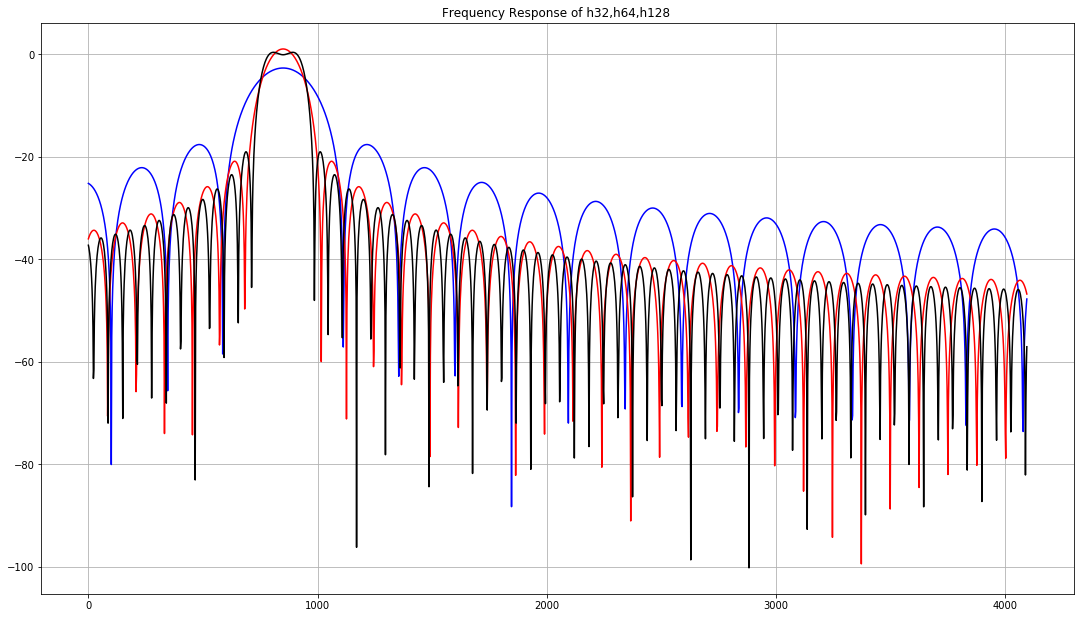

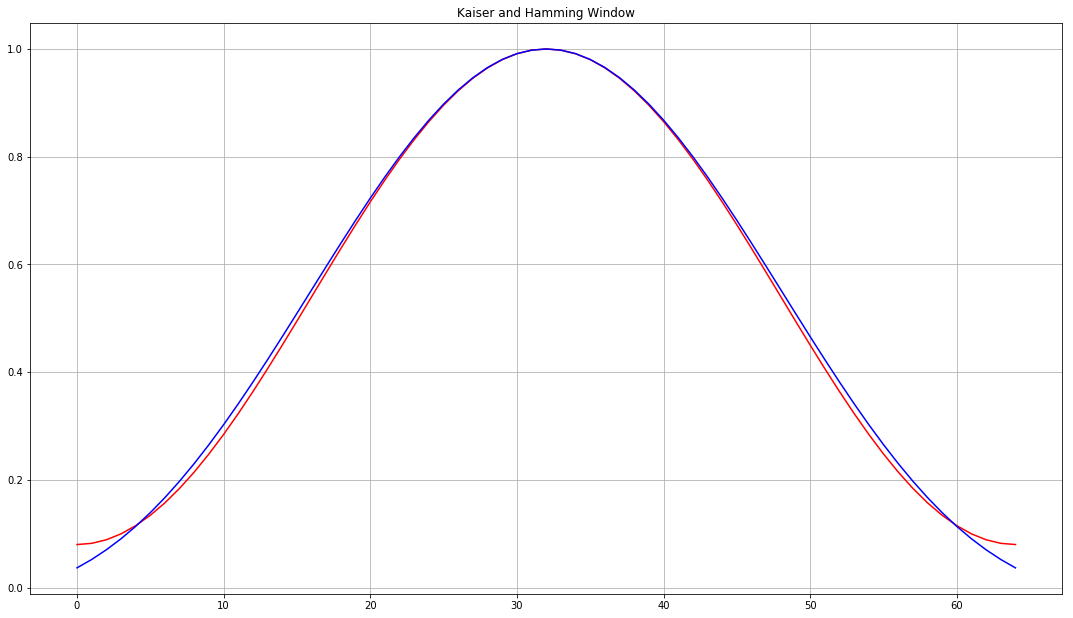

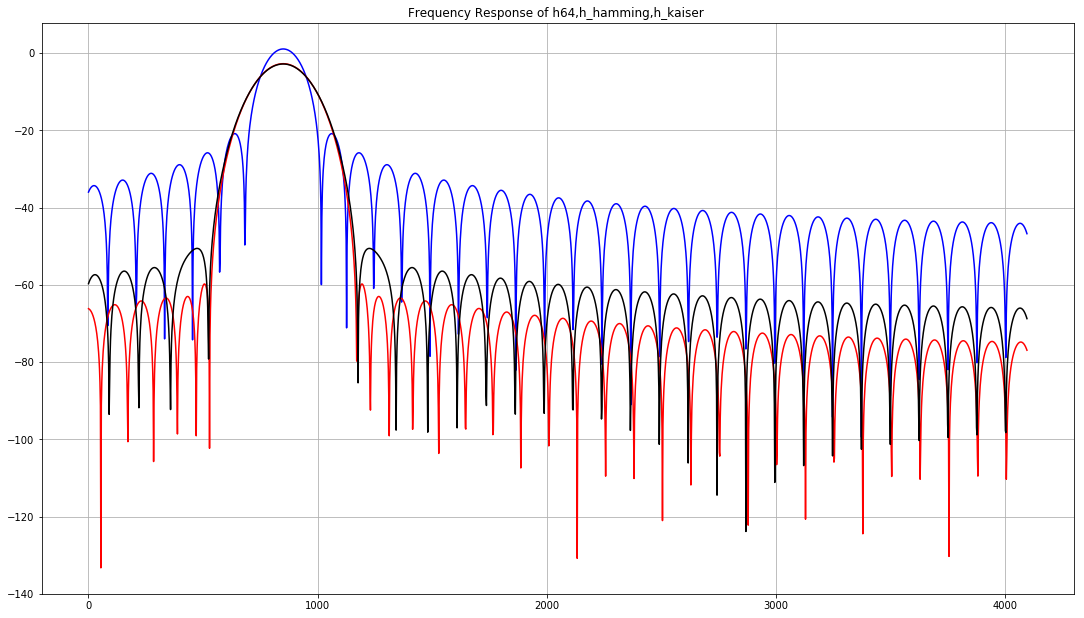

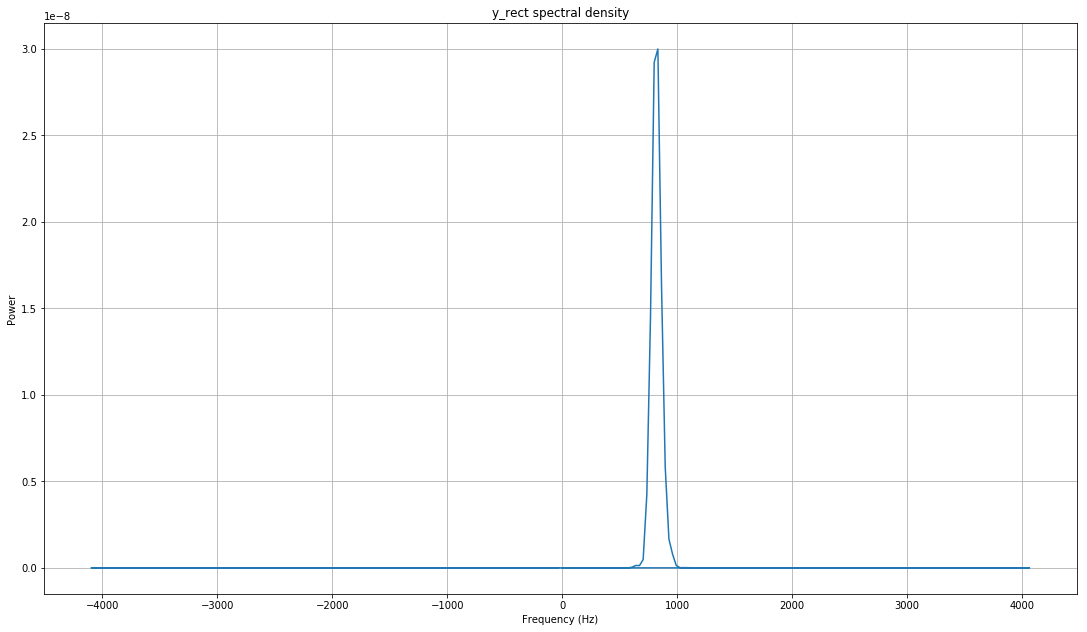

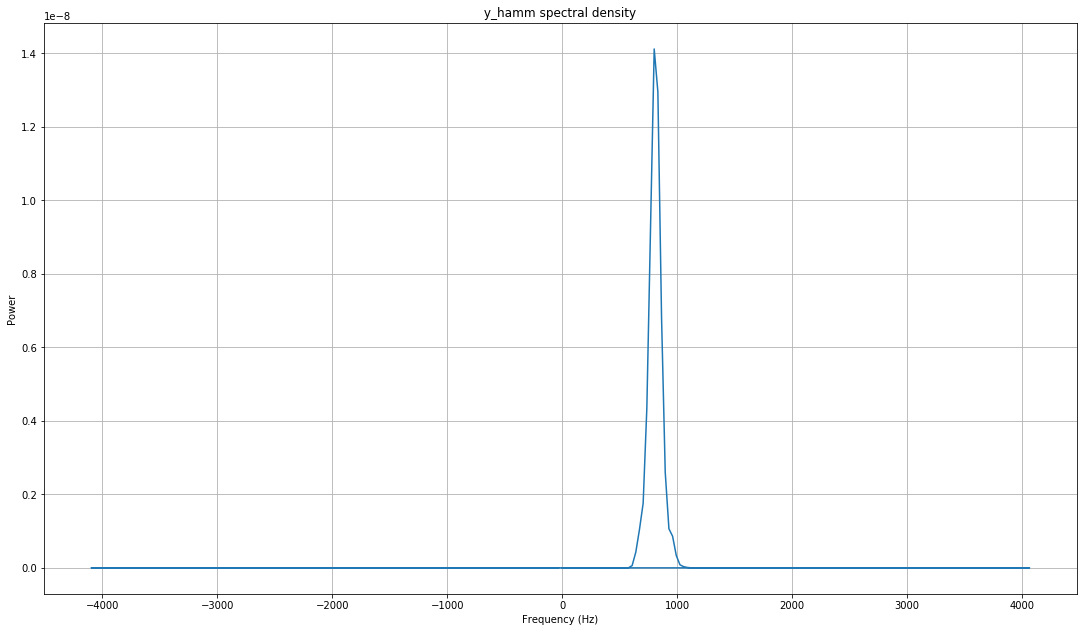

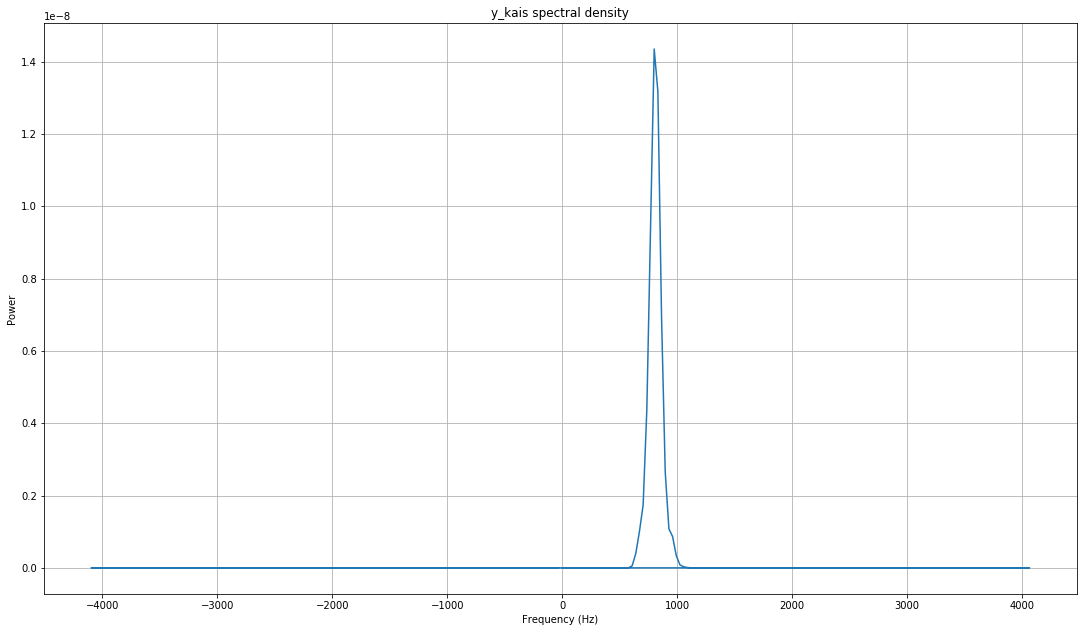

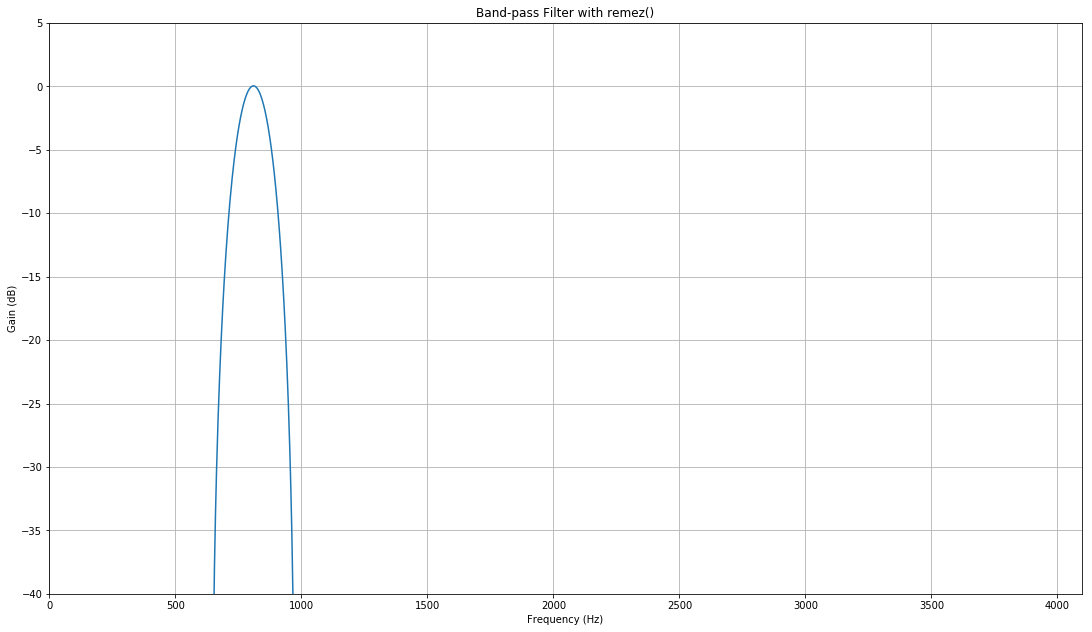

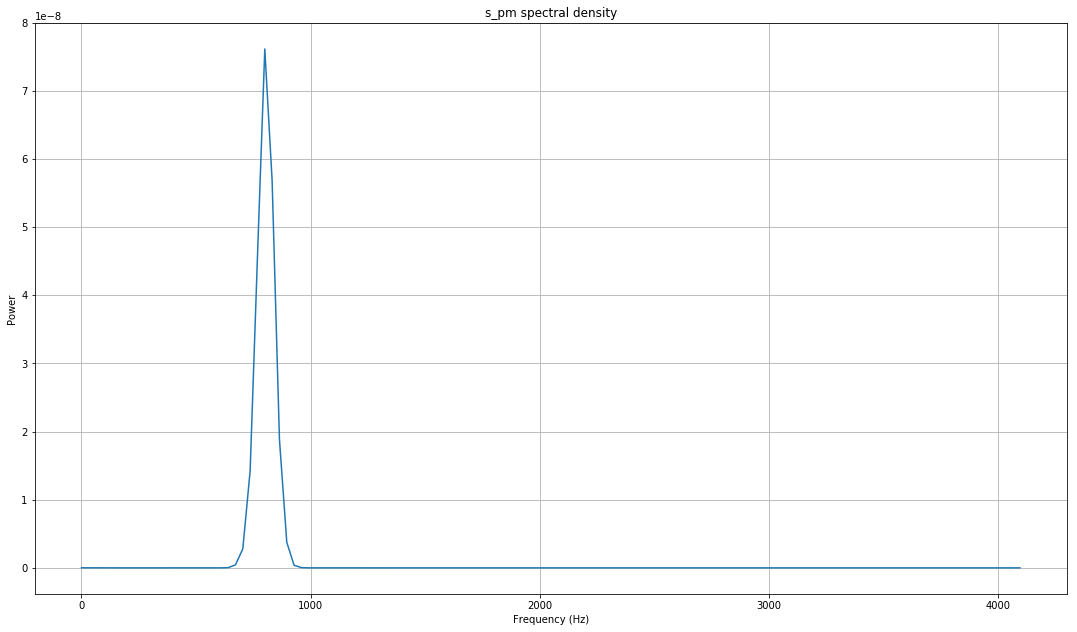

In [26]:
def plot_response(fs, w, h, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
    plt.ylim(-40, 5)
    plt.xlim(0, 0.5*fs)
    plt.grid(True)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain (dB)')
    plt.title(title)


mat = spio.loadmat('sima.mat', squeeze_me=True) # Το αρχείο "sima.mat" περιέχει το σήμα s και τη συχνότητα
                                            # δειγματοληψίας Fs. Το φάσμα του σήματος εκτείνεται σχεδόν σε όλη την
                                            # περιοχή συχνοτήτων μέχρι 4 KHz. Πάνω από 1 KHz, όμως, είναι θόρυβος
                                            #και πρέπει να φιλτραριστεί.

s = mat['s'] # array
Fs= mat['Fs']



#Ορίζεται η ιδανική ζωνοπερατη συνάρτηση H  με ζώνη διέλευσης  (750 Hz, 950 Hz)
y=np.zeros(750)
t=np.ones(200)
j=np.zeros(Fs-950)
H = np.concatenate((y, t,j))
#Υπολογίζεται η κρουστική απόκριση με αντίστροφο μετασχ. Fourier
u=np.fft.ifft(H)

middle=int(len(u)/2)

h= np.fft.fftshift(u)
h32=h[middle-16:middle+17] # h32=h(middle+1-16:middle+17) se matlab αλλα σε python δεν χρειάζεται το +1
h64=h[middle-32:middle+33]
h128=h[middle-64:middle+65]

w1, h1 = signal.freqz(h32, a=1, worN=2048, whole=False, plot=None, fs=Fs)
w2, h2 = signal.freqz(h64, a=1, worN=2048, whole=False, plot=None, fs=Fs)
w3, h3 = signal.freqz(h128, a=1, worN=2048, whole=False, plot=None, fs=Fs)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(w1, 20 * np.log10(abs(h1)), 'b')
ax.set( title='Frequency Response of h32,h64,h128 ')


ax.plot(w2, 20 * np.log10(abs(h2)), 'r')

ax.plot(w3, 20 * np.log10(abs(h3)), 'k')



ax.grid()

plt.show()

#Οι πλευρικοί λοβοί είναι υψηλοί!
# Πολλαπλασιάζουμε την περικομμένη κρουστική απόκριση με κατάλληλο  παράθυρο. Χρησιμοποιούμε την h64 και παράθυρα hamming και kaiser
wh=np.hamming(len(h64))
wk=np.kaiser(len(h64),5)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(np.arange(0,65),wh,'r')
ax.set( title='Kaiser and Hamming Window')

ax.plot(np.arange(0,65),wk,'b')
ax.grid()

plt.show()

h_hamming=np.multiply(h64,np.transpose(wh))
                      
#plt.plot(np.arange(0,len(h64)), h_hamming, '-.')

 
#plt.setp(baseline, color='r', linewidth=2)
#plt.show()
h_kaiser =np.multiply(h64,np.transpose(wk))

wkais, hkais = signal.freqz(h_kaiser, a=1, worN=2048, whole=False, plot=None, fs=Fs)
wham, hham = signal.freqz(h_hamming, a=1, worN=2048, whole=False, plot=None, fs=Fs)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(w2, 20 * np.log10(abs(h2)), 'b')
ax.set( title='Frequency Response of h64,h_hamming,h_kaiser ')


ax.plot(wkais, 20 * np.log10(abs(hkais)), 'r')

ax.plot(wham, 20 * np.log10(abs(hham)), 'k')
ax.grid()

plt.show()


#Φιλτράρουμε το σήμα μας με καθένα από τα τρία φίλτρα
y_rect=np.convolve(s,h64)

f1, Pxx1 = signal.welch(y_rect, Fs)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f1,Pxx1)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title='y_rect spectral density')
ax.grid()
plt.show()

y_hamm=np.convolve(s,h_hamming)
f2, Pxx2 = signal.welch(y_hamm, Fs)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f2,Pxx2)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title=' y_hamm spectral density ')
ax.grid()
plt.show()

y_kais=np.convolve(s,h_kaiser)
f3, Pxx3 = signal.welch(y_kais, Fs)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f3,Pxx3)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title='y_kais spectral density')
ax.grid()
plt.show()

#Δημιουργία band pass filter με χρήση της συναρτησης remez
#Να σχεδιαστεί και υλοποιηθεί ψηφιακό φίλτρο ζώνης διέλευσης, τέτοιο ώστε εφαρμοζόμενο
#στο σήμα του παραδείγματος 1.2 να αποκόβει κάθε συνιστώσα κάτω των 600 Hz και άνω των
#900 Hz.

# Band-pass filter design parameters

fs = 8192       # Sample rate, Hz
band = [800, 820]  # Desired pass band, HzP  
trans_width = 150    # Width of transition from pass band to stop band, Hz
numtaps = 125      # Size of the FIR filter.

edges = [0, band[0] - trans_width,
         band[0], band[1],
         band[1] + trans_width, 0.5*fs]
taps = signal.remez(numtaps, edges, [0, 1, 0], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)

plot_response(fs, w, h, "Band-pass Filter with remez()")

s_pm=np.convolve(s,taps)
f4, Pxx4 = signal.welch(s_pm, Fs)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f4,Pxx4)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title='s_pm spectral density')
ax.grid()
plt.show()


import sounddevice as sd
#sd.play(s,Fs) # before !python3 -m pip install sounddevice --user 
                 
sd.play(s_pm,Fs)  #hear the sonar signal

### Μέρος 4 : Εφαρμογή Β

Να σχεδιαστεί και υλοποιηθεί σε  φίλτρο, όπως στην Εφαρμογή Α, με δύο ζώνες
διέλευσης: (750 Hz, 950 Hz) και (1400 Hz, 1800 Hz) .Δηλαδή πρέπει να φτιάξουμε 2 ζωνοπερατά φίλτρα.
Θα χρησιμοποιήσω τη συνάρτηση remez() της python για την υλοποίηση του φίλτρου και στη συνέχεια υπολογίζω τη συνέλιξη του με το αρχικό σήμα s. 
Documentation για τη remez() https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.remez.html

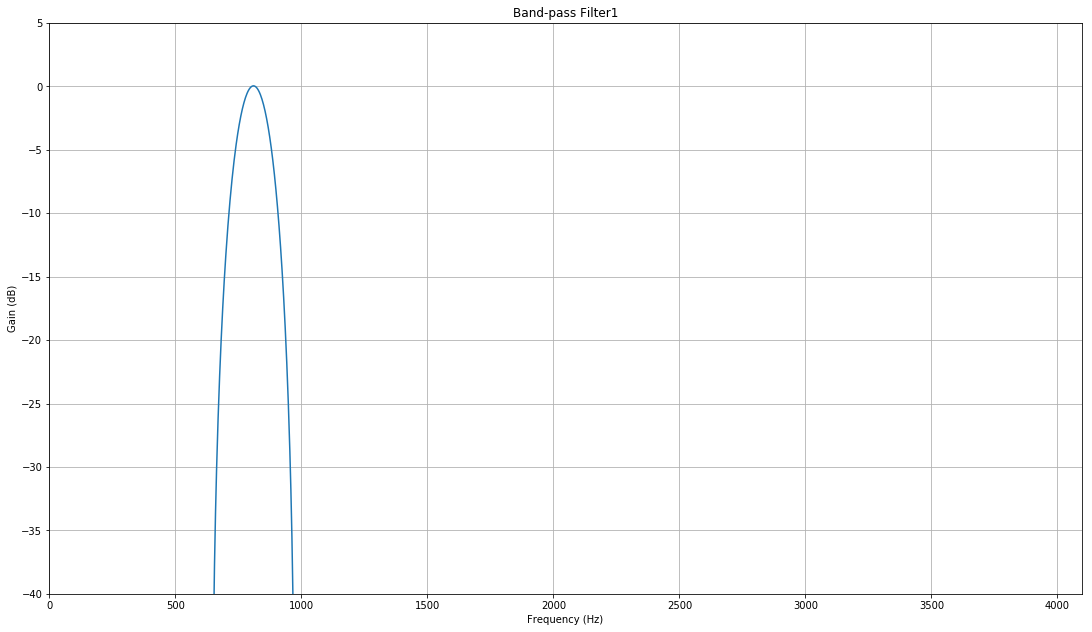

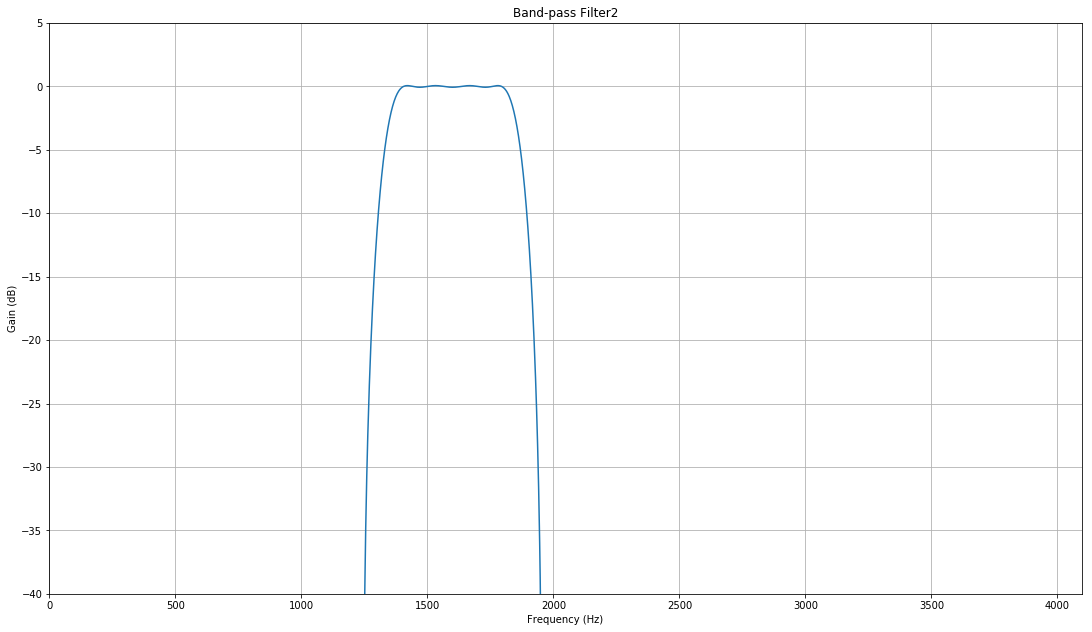

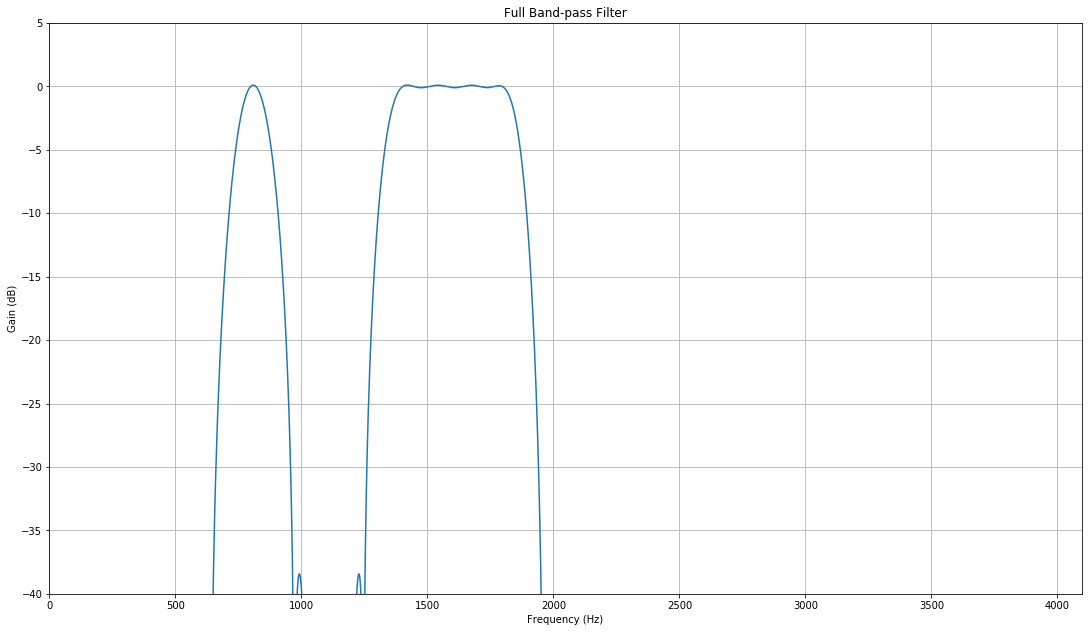

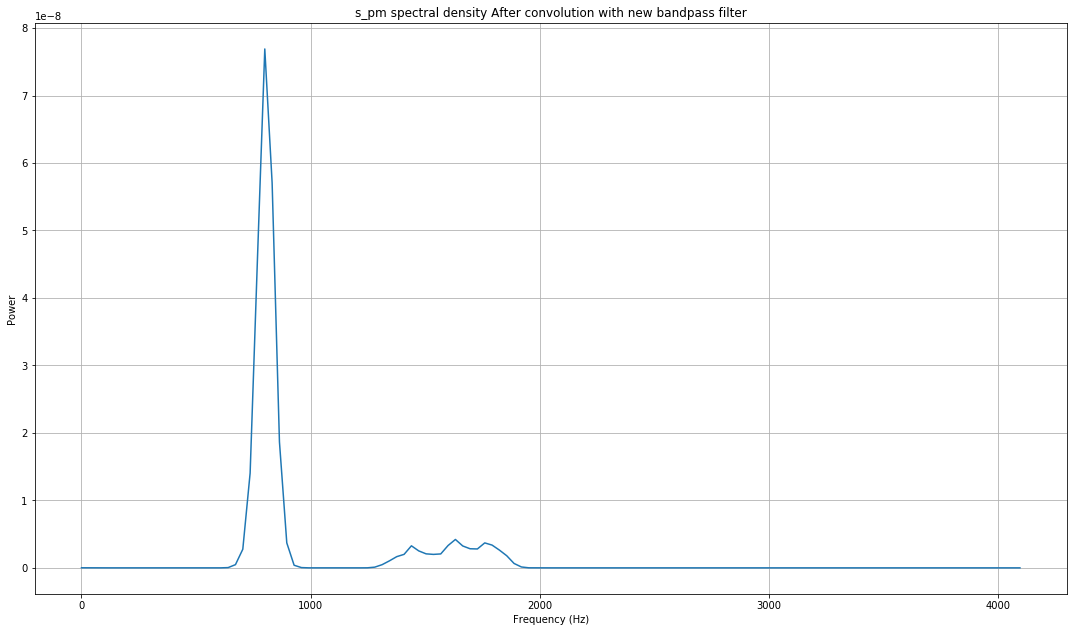

In [27]:
def plot_response(fs, w, h, title): # για επιβεβαίωση σωστού φίλτρου
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
    plt.ylim(-40, 5)
    plt.xlim(0, 0.5*fs)
    plt.grid(True)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain (dB)')
    plt.title(title)
    
    
    

band1 = [800, 820]  # Desired pass band, Hz
trans_width = 150    # Width of transition from pass band to stop band, Hz
numtaps = 125        # Size of the FIR filter.

edges1 = [0, band1[0] - trans_width,
         band1[0], band1[1],
         band1[1] + trans_width, 0.5*Fs]
taps1 = signal.remez(numtaps, edges1, [0, 1, 0], Hz=Fs)
w, h = signal.freqz(taps1, [1], worN=2000)
plot_response(fs, w, h, "Band-pass Filter1")

band2 = [1400, 1800] 
edges2 = [0, band2[0] - trans_width,
         band2[0], band2[1],
         band2[1] + trans_width, 0.5*Fs]
taps2 = signal.remez(numtaps, edges2, [0, 1, 0], Hz=Fs)
w, h = signal.freqz(taps2, [1], worN=2000)

plot_response(fs, w, h, "Band-pass Filter2")
    
BP= taps1+taps2
w, h = signal.freqz(BP, [1], worN=2000)
plot_response(fs, w, h, "Full Band-pass Filter")

s_pm=np.convolve(s,BP)

f4, Pxx4 = signal.welch(s_pm, Fs)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f4,Pxx4)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title='s_pm spectral density After convolution with new bandpass filter')
ax.grid()
plt.show()


import sounddevice as sd
#sd.play(s,Fs) # before !python3 -m pip install sounddevice --user 
                 
sd.play(s_pm,Fs)  #hear the sonar signal